# Test by Seismosignal

In [1]:
import gmspy as gm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
valid_data = pd.read_excel("Northridge.xlsx", sheet_name=None)

## SeismoGM ---Solving IMs, response spectra, etc.

In [3]:
ts, acc = gm.load_gm_examples("Northridge")
dt = ts[1] - ts[0]

In [4]:
GM = gm.SeismoGM(dt=dt, acc=acc, unit="g")

acc-unit: g;
vel-unit；cm/s;
disp-unit: cm

In [5]:
vel, disp = GM.get_vel(), GM.get_disp()
ts = GM.get_time()

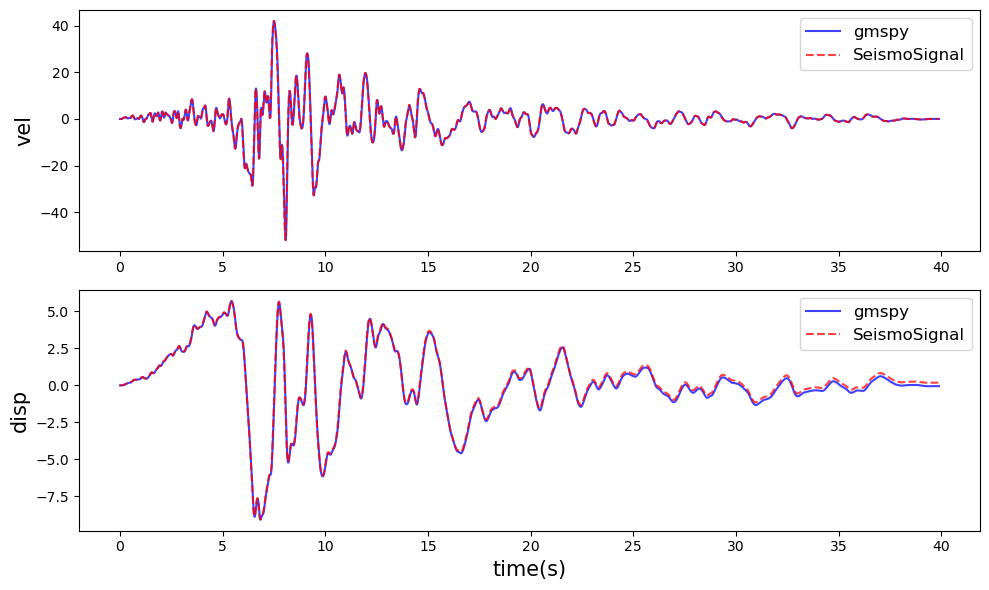

In [6]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6))
axs[0].plot(ts, vel, c="b", alpha=0.75, label="gmspy")
axs[0].plot(
    valid_data["Hist"]["time"],
    valid_data["Hist"]["vel"],
    c="r",
    ls="--",
    alpha=0.75,
    label="SeismoSignal",
)
axs[0].set_ylabel("vel", fontsize=15)
axs[1].plot(ts, disp, c="b", alpha=0.75, label="gmspy")
axs[1].plot(
    valid_data["Hist"]["time"],
    valid_data["Hist"]["disp"],
    c="r",
    ls="--",
    alpha=0.75,
    label="SeismoSignal",
)
axs[1].set_ylabel("disp", fontsize=15)
axs[1].set_xlabel("time(s)", fontsize=15)
for ax in axs:
    ax.legend(fontsize=12)
plt.tight_layout()
#plt.savefig("hist_valid.png", dpi=150)
plt.show()

### Get IMs independent of response spectra

In [7]:
ims = GM.get_ims(display_results=True)

┏━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ IM        ┃  Value   ┃         Unit         ┃                                           Name ┃
┡━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ PGA       │  0.568   │          g           │                       Peak ground acceleration │
│ PGV       │  51.833  │         cm/s         │                           Peak ground velocity │
│ PGD       │  9.073   │          cm          │                       Peak ground displacement │
│ V_A       │  0.093   │          s           │                                        PGV/PGA │
│ D_V       │  0.175   │          s           │                                        PGD/PGV │
│ EDA       │  0.578   │          g           │                  Effective Design Acceleration │
│ Ia        │  2.732   │         m/s          │                                Arias Intensity │
│ Ima       │  0.094   │         m/s          │                       Modified Arias Intensity │
│ MIV       │  64.050  │         cm/s         │                   Maximum Incremental Velocity │
│ Arms      │  0.067   │          g           │               Root-mean-square of acceleration │
│ Vrms      │  7.274   │         cm/s         │                   Root-mean-square of velocity │
│ Drms      │  2.381   │          cm          │               Root-mean-square of displacement │
│ Pa        │  0.018   │        (g)^2         │ Housner earthquake power index of acceleration │
│ Pv        │ 202.143  │       (cm/s)^2       │     Housner earthquake power index of velocity │
│ Pd        │  15.696  │        (cm)^2        │ Housner earthquake power index of displacement │
│ Ra        │  1.185   │      g*s^(1/3)       │                  Riddell index of acceleration │
│ Rv        │  28.992  │ (cm/s)^(2/3)*s^(1/3) │                      Riddell index of velocity │
│ Rd        │  18.920  │      cm*s^(1/3)      │                  Riddell index of displacement │
│ SED       │ 2110.621 │        cm2/s         │                        Specific Energy Density │
│ If        │  89.951  │    (cm/s)*s^(1/4)    │                                   Fajfar index │
│ Ic        │  0.109   │  (g)^(2/3)*s^(1/2)   │                       Characteristic Intensity │
│ Icm       │  5.905   │          --          │                     Cosenza–Manfredi Intensity │
│ CAV       │ 1292.804 │         cm/s         │                   Cumulative Absolute Velocity │
│ CAD       │ 157.841  │          cm          │               Cumulative Absolute Displacement │
│ CAI       │  62.721  │         cm*s         │                    Cumulative Absolute Impetus │
│ CAVstd    │  1.241   │         g*s          │       tandardized Cumulative Absolute Velocity │
│ Ip        │  24.918  │          --          │                              Impulsivity Index │
│ Tsig_5_95 │  9.070   │          s           │                5%-95% Arias intensity duration │
│ Tsig_5_75 │  3.890   │          s           │                5%-75% Arias intensity duration │
│ Tbd       │  23.080  │          s           │                             Bracketed duration │
│ Tud       │  11.903  │          s           │                               Uniform duration │
└───────────┴──────────┴──────────────────────┴────────────────────────────────────────────────┘

### Elastic response spectra, PSa, PSv, Sa, Sv, Sd

In [8]:
Ts = np.arange(0.00, 4.05, 0.05)
spectra = GM.get_elas_spec(Ts=Ts, damp_ratio=0.05, plot=False)

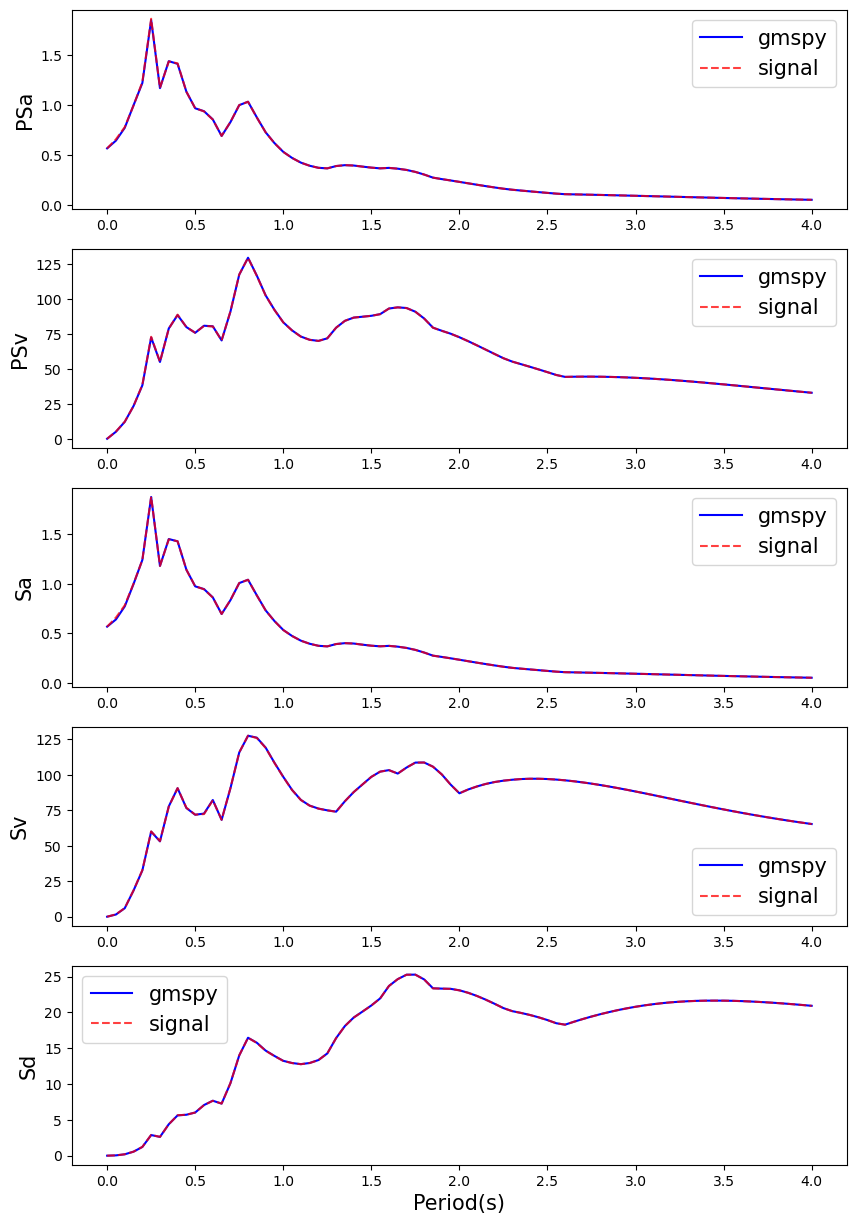

In [9]:
labels = ["PSa", "PSv", "Sa", "Sv", "Sd"]
fig, axs = plt.subplots(5, 1, figsize=(10, 15))
for i in range(5):
    axs[i].plot(Ts, spectra[:, i], c="b", label='gmspy')
    axs[i].plot(
        valid_data["ElasSpec"]["Period"], valid_data["ElasSpec"].iloc[:, i+1],
        c="r", ls='--', alpha=0.75, label='signal'
    )
    axs[i].set_ylabel(labels[i], fontsize=15)
    axs[i].legend(fontsize=15)
axs[-1].set_xlabel('Period(s)', fontsize=15)
plt.savefig("ElasSpec_valid.png", dpi=150)
plt.show()

### Fourier magnitude and power spectra

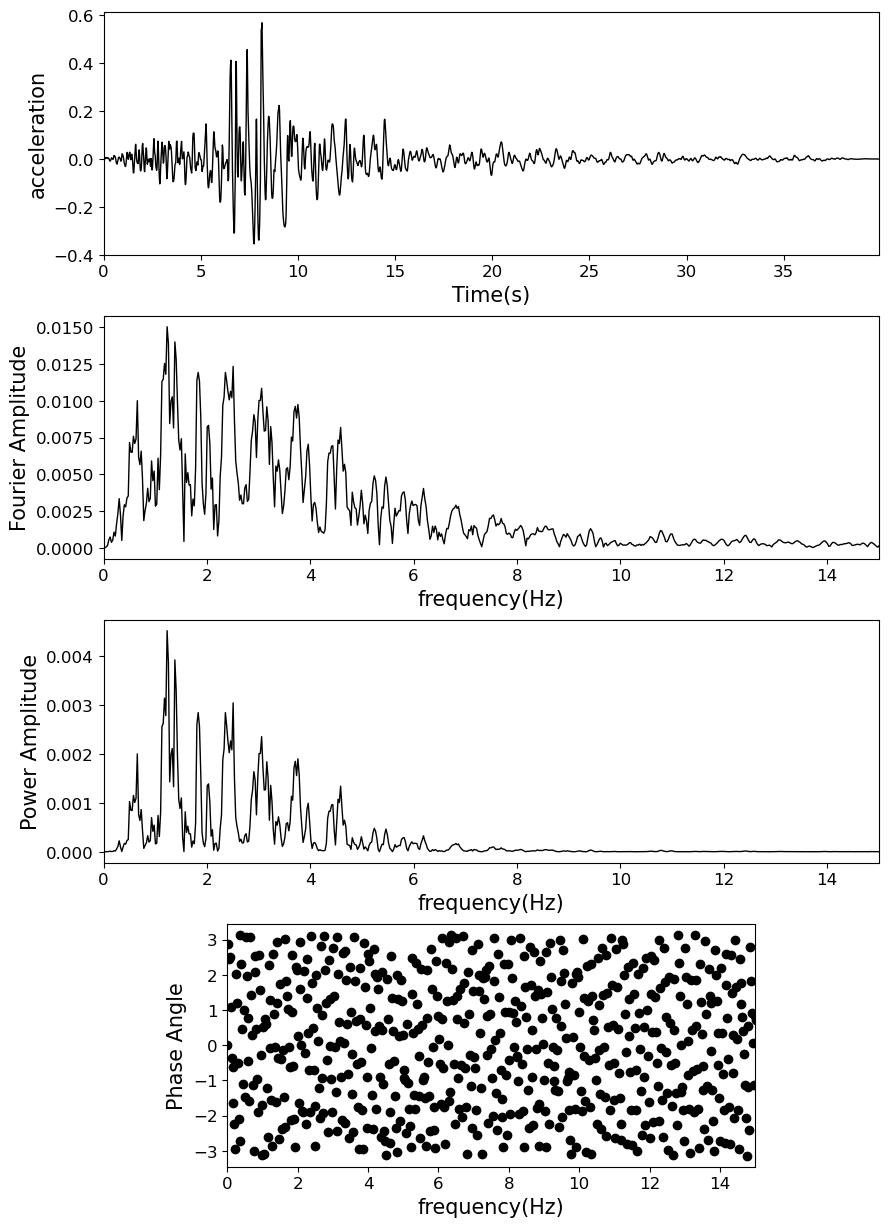

In [10]:
output = GM.get_fou_pow_spec(plot=True)

### Constant ductility response spectra

In [13]:
mus = [1, 2, 3, 4, 5]
Ts = np.arange(0.05, 4.05, 0.05)
output = []
for mu in mus:
    output.append(GM.get_const_duct_spec(
        Ts=Ts, harden_ratio=0.02, damp_ratio=0.05, mu=mu, plot=False
    ))

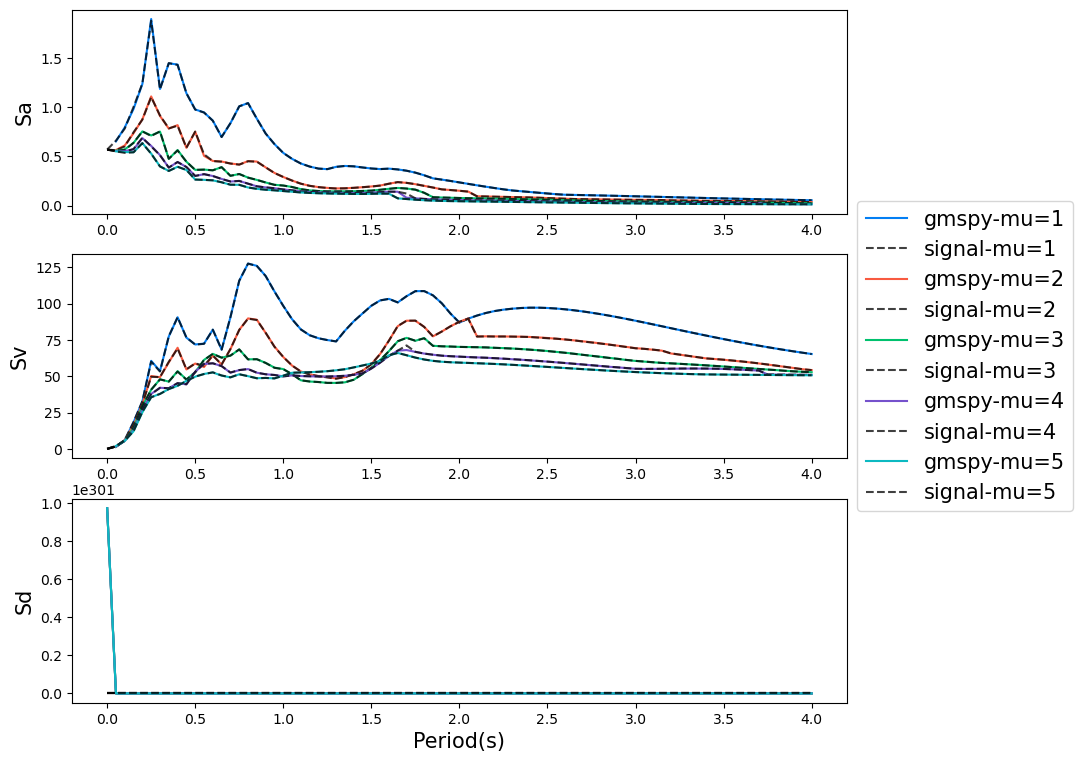

In [14]:
labels = ["Sa", "Sv", "Sd"]
names = ['CDSP-Sa', 'CDSP-Sv', 'CDSP-Sd']

colors=['#037ef3','#f85a40','#00c16e','#7552cc','#0cb9c1','#f48924']
fig, axs = plt.subplots(3, 1, figsize=(10, 9))
for i in range(3):
    for j in range(5):
        axs[i].plot(Ts, output[j][:, i], c=colors[j], label=f'gmspy-mu={j+1}')
        axs[i].plot(
            valid_data[names[i]].iloc[:, 0], valid_data[names[i]].iloc[:, j+1],
            c='k', ls='--', alpha=0.75, label=f'signal-mu={j+1}'
        )
    axs[i].set_ylabel(labels[i], fontsize=15)
axs[1].legend(fontsize=15, loc='center left', bbox_to_anchor=(1., 0.5))
axs[-1].set_xlabel('Period(s)', fontsize=15)
plt.savefig("CDSP_valid.png", dpi=150,bbox_inches='tight')
plt.show()

### Other Response Spectra Related IMs

#### Spectral values at the first period of the structure

In [13]:
T1 = 1.0
GM.get_elas_spec(Ts=T1)

array([[ 0.53315556, 83.24211102,  0.53499668, 98.5966728 , 13.24839344]])

#### Cordova Intensity

In [14]:
GM.get_sac(T1=1)

0.35495846815217114

#### Vamvatsikos Intensity

In [15]:
GM.get_savam(T1=1, T2=0.75, T3=2)

0.5024179810591735

#### Multiple-Period Intensity

In [16]:
GM.get_samp(T1=1, T2=0.75, m1=0.2, m2=0.1)

0.6604615458534404

#### Average Spectral Acceleration, Velocity and Displacement

In [17]:
Tavg = np.arange(0.05, 4.05, 0.05)
GM.get_avgsavd(Tavg=Tavg)

array([ 0.23586776, 77.24200569, 13.54999167])

#### The peak of the response spectra

In [18]:
GM.get_savdp()

array([  1.99111064, 131.66901656,  25.36622171])

#### Acceleration (ASI)，Velocity (VSI) and Displacement(DSI) Spectrum Intensity

In [19]:
GM.get_avdsi()

array([  0.50384894, 210.6503441 ,  30.70334309])

#### Housner Spectra Intensity (HSI)

In [20]:
GM.get_hsi()

76.26728922485613

#### Effective peak acceleration (EPA), velocity (EPV) and displacement (EPD)

In [21]:
GM.get_epavd()

array([ 0.49683476, 38.27570156,  8.18487611])